# Lambert conformal projection

High-latitude areas should rather be plotted on an area-conserving projection. In the few lines of code below you find some examples to get you started.  

First, the imports. They are the same as always, but I removed the figure size defaults:

In [1]:
# Import the tools we are going to need today:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list

## Read and select the regional data

Reading the data works as allways:

In [2]:
ds = xr.open_dataset('../data/ERA5_LowRes_Invariant.nc')

To select the data for a specific region, we will use xray's ``sel`` function as we learned it in the exercises. I've made a pre-selection for you but you are free to make the domain bigger/smaller if you find it useful for your analyses! Just **uncomment the two lines relevant for your case**:

In [3]:
# North-America -- note that I have to make the domain much larger in order to "fill" the plot below
ds = ds.sel(latitude=slice(80, 10), longitude=slice(-180, 0))
plt.rcParams['figure.figsize'] = (10, 6)

Note that I set the standard figure size for each region. You can allways change those, and also make plots of any size later on (examples below).

Now we read the variable:

In [4]:
z = ds.z / 9.81

## Define the projection

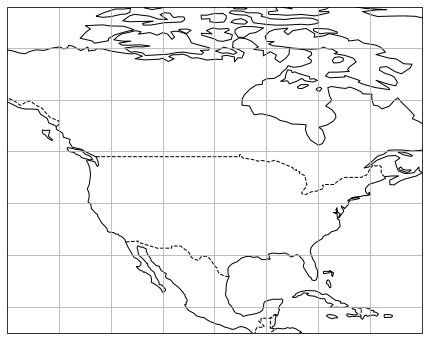

In [5]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-140, -60, 15, 75], ccrs.Geodetic())
ax.coastlines(); ax.gridlines();
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');

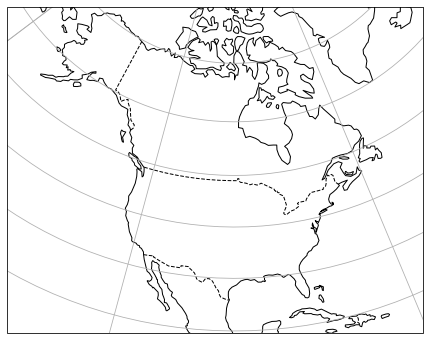

In [6]:
ax = plt.axes(projection=ccrs.LambertConformal())
ax.set_extent([-140, -60, 15, 75], ccrs.Geodetic())
ax.coastlines(); ax.gridlines();
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');

## Make a plot

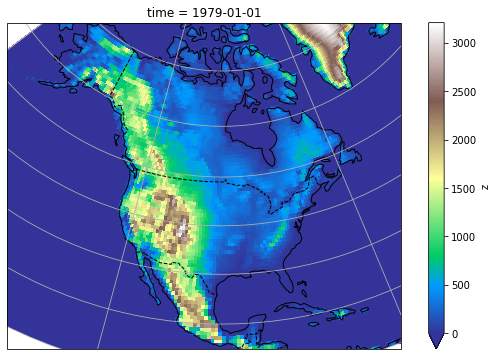

In [7]:
ax = plt.axes(projection=ccrs.LambertConformal())
ax.set_extent([-140, -60, 15, 75], ccrs.PlateCarree())
ax.coastlines();
ax.gridlines();
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
z.plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0, cmap='terrain');

**OK, you should be good now!**

## Tired of writing so many lines?

Note that it is possible to simplify your plotting commands by writing a **function**:

In [8]:
def prepare_plot(figsize=None):
    """This function returns prepared axes for the regional plot.
    
    Usage:
        fig, ax = prepare_plot()
    """
    fig = plt.figure(figsize=figsize)
    ax = plt.axes(projection=ccrs.LambertConformal())
    ax.set_extent([-140, -60, 15, 75], ccrs.PlateCarree())
    ax.coastlines(); ax.gridlines();
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
    return fig, ax

Now, making a plot has become even easier:

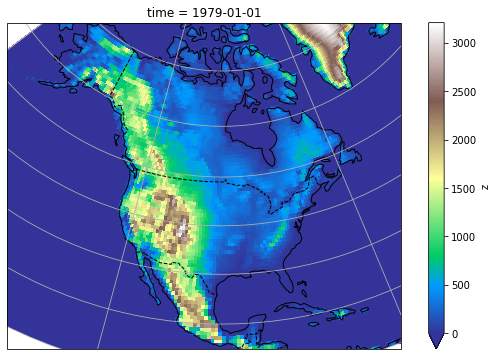

In [9]:
fig, ax = prepare_plot()
z.plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0, cmap='terrain');

## Need to save the plot for your presentation?

**The easiest way is to use "right-click -> save as" on the image in the notebook.**

Also, you can save the plot as pdf or png quite easily (examples below). But this might look quite different as the picture on screen sometimes...

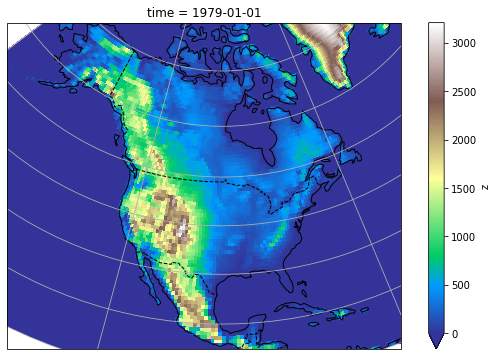

In [10]:
fig, ax = prepare_plot()
z.plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0, cmap='terrain');
plt.savefig('topo.pdf')

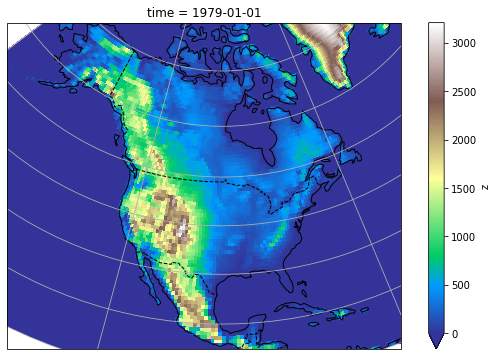

In [11]:
fig, ax = prepare_plot()
z.plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0, cmap='terrain');
plt.savefig('topo.png')